In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('heart.csv', sep=',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Train-test seperation of data

In [3]:
from train_test_split import stratified_train_test_split

X = df.drop(columns='target')
y = df.target

X_train, X_test, y_train, y_test = stratified_train_test_split(X, y, split=0.2)

print(f'Distribution in y: \n{y.value_counts()}\n')
print(f'Distribution in y train: \n{y_train.value_counts()}\n')
print(f'Distribution in y test: \n{y_test.value_counts()}\n')

Distribution in y: 
1    165
0    138
Name: target, dtype: int64

Distribution in y train: 
1    132
0    111
Name: target, dtype: int64

Distribution in y test: 
1    33
0    27
Name: target, dtype: int64



### Decition Tree (DT)

In [6]:
from DecisionTree import DecisionTree

clf = DecisionTree(min_samples_split=3,max_depth=20,n_features=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


from evaluator import ConfusionMatrix

confusion = ConfusionMatrix()

dt_precision_value, dt_accuracy_value, dt_sensivity_value, dt_specifity_value = confusion.getEvaluation(y_test, y_pred)

print(f'The precition of the DT model: {dt_precision_value}')
print(f'The accuracy of the DT model: {dt_accuracy_value}')
print(f'The sensivity of the DT model: {dt_sensivity_value}')
print(f'The specifity of the DT model: {dt_specifity_value}')

The precition of the DT model: 0.889
The accuracy of the DT model: 0.82
The sensivity of the DT model: 0.75
The specifity of the DT model: 1


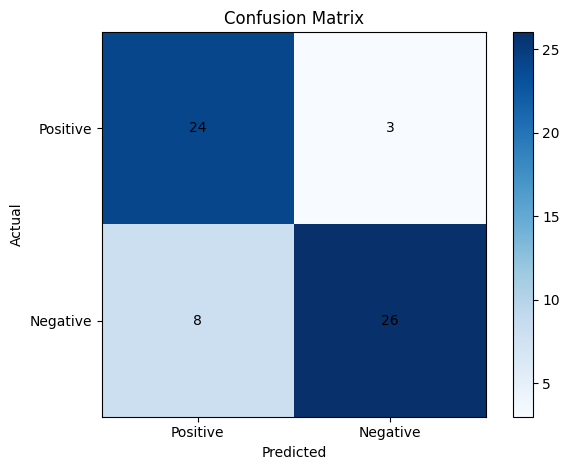

In [7]:
confusion.getGraph()